In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
cars_df = pd.read_csv("cars.csv")

In [3]:
cars_df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               53 non-null     int64  
 1   Make               53 non-null     object 
 2   Model              53 non-null     object 
 3   Size               53 non-null     object 
 4   (kW)               53 non-null     int64  
 5   Unnamed: 5         53 non-null     object 
 6   TYPE               53 non-null     object 
 7   CITY (kWh/100 km)  53 non-null     float64
 8   HWY (kWh/100 km)   53 non-null     float64
 9   COMB (kWh/100 km)  53 non-null     float64
 10  CITY (Le/100 km)   53 non-null     float64
 11  HWY (Le/100 km)    53 non-null     float64
 12  COMB (Le/100 km)   53 non-null     float64
 13  (g/km)             53 non-null     int64  
 14  RATING             19 non-null     float64
 15  (km)               53 non-null     int64  
 16  TIME (h)           53 non-nu

In [5]:
cars_df.columns

Index(['YEAR', 'Make', 'Model', 'Size', '(kW)', 'Unnamed: 5', 'TYPE',
       'CITY (kWh/100 km)', 'HWY (kWh/100 km)', 'COMB (kWh/100 km)',
       'CITY (Le/100 km)', 'HWY (Le/100 km)', 'COMB (Le/100 km)', '(g/km)',
       'RATING', '(km)', 'TIME (h)'],
      dtype='object')

In [6]:
cars_df.columns = cars_df.columns.str.strip()

# Display the column names to verify them
print(cars_df.columns)

Index(['YEAR', 'Make', 'Model', 'Size', '(kW)', 'Unnamed: 5', 'TYPE',
       'CITY (kWh/100 km)', 'HWY (kWh/100 km)', 'COMB (kWh/100 km)',
       'CITY (Le/100 km)', 'HWY (Le/100 km)', 'COMB (Le/100 km)', '(g/km)',
       'RATING', '(km)', 'TIME (h)'],
      dtype='object')


## Summary Statistics

In [7]:
cars_df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,53.0,2014.735849,1.227113,2012.0,2014.0,2015.0,2016.0,2016.0
(kW),53.0,190.622642,155.526429,35.0,80.0,107.0,283.0,568.0
CITY (kWh/100 km),53.0,19.647170,3.001000,15.2,17.0,19.0,22.4,23.9
HWY (kWh/100 km),53.0,21.633962,1.245753,18.8,20.8,21.7,22.5,23.3
COMB (kWh/100 km),53.0,20.541509,1.979455,16.8,18.7,20.0,22.1,23.6
CITY (Le/100 km),53.0,2.207547,0.344656,1.7,1.9,2.1,2.5,2.7
HWY (Le/100 km),53.0,2.422642,0.143636,2.1,2.3,2.4,2.5,2.6
COMB (Le/100 km),53.0,2.301887,0.212576,1.9,2.1,2.2,2.5,2.6
(g/km),53.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
RATING,19.0,10.000000,0.000000,10.0,10.0,10.0,10.0,10.0


## Comparative Analysis

In [8]:
import matplotlib.pyplot as plt

In [9]:
energy_consumption_comparison = cars_df.groupby(['Make', 'Model'])[['CITY (kWh/100 km)', 'HWY (kWh/100 km)', 'COMB (kWh/100 km)']].mean().reset_index()

         Make           Model  CITY (kWh/100 km)  HWY (kWh/100 km)  \
0         BMW              i3               15.2              18.8   
1   CHEVROLET        SPARK EV               16.0              19.6   
2        FORD  FOCUS ELECTRIC               19.0              21.1   
3         KIA         SOUL EV               17.5              22.7   
4  MITSUBISHI          i-MiEV               16.9              21.4   

   COMB (kWh/100 km)  
0               16.8  
1               17.8  
2               20.0  
3               19.9  
4               18.7  


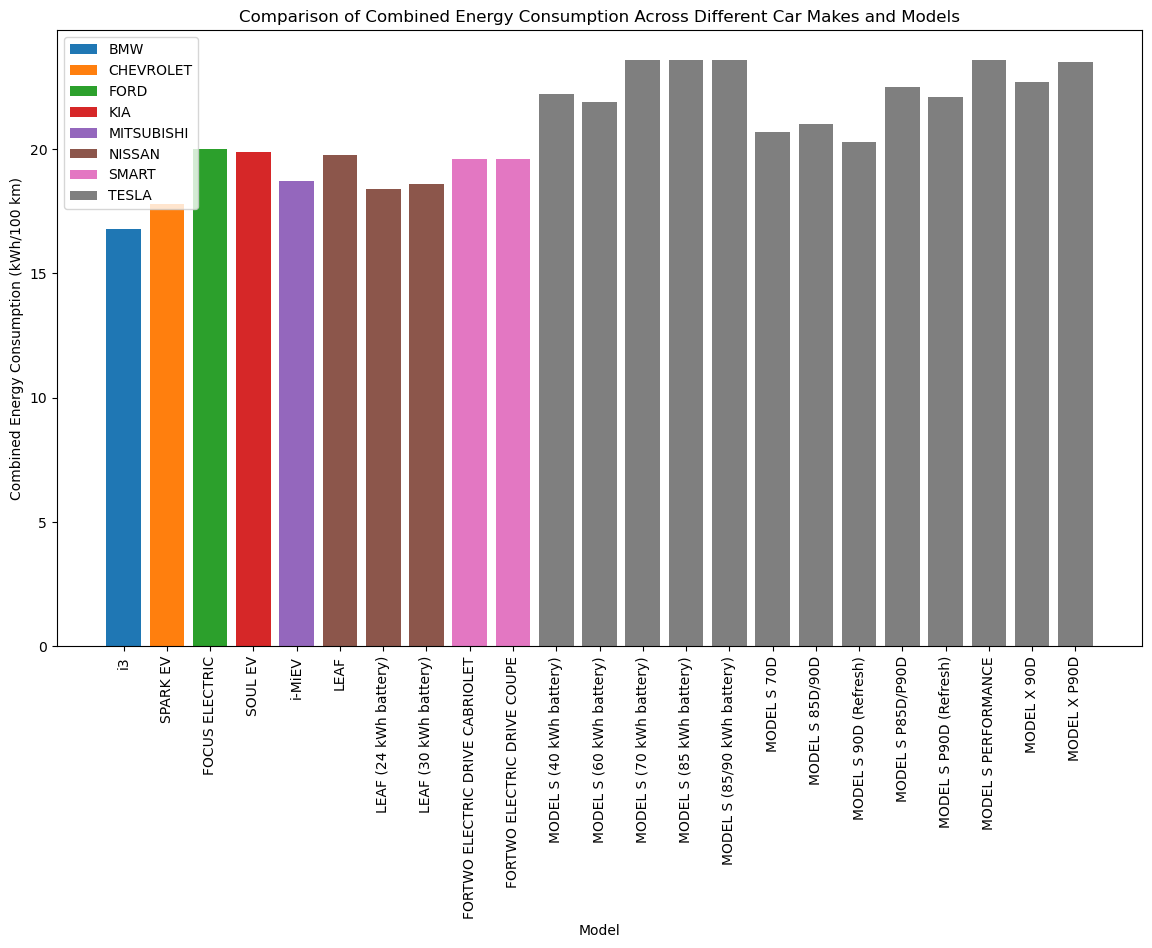

In [10]:
print(energy_consumption_comparison.head())

# Visualization
import matplotlib.pyplot as plt

# Plotting the combined energy consumption for each make and model
plt.figure(figsize=(14, 8))
for label, df in energy_consumption_comparison.groupby('Make'):
    plt.bar(df['Model'], df['COMB (kWh/100 km)'], label=label)
plt.xlabel('Model')
plt.ylabel('Combined Energy Consumption (kWh/100 km)')
plt.title('Comparison of Combined Energy Consumption Across Different Car Makes and Models')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [11]:
energy_consumption_by_size = cars_df.groupby('Size')[['CITY (kWh/100 km)', 'HWY (kWh/100 km)', 'COMB (kWh/100 km)']].mean().reset_index()

                    Size  CITY (kWh/100 km)  HWY (kWh/100 km)  \
0                COMPACT          19.000000         21.100000   
1              FULL-SIZE          22.757143         21.847619   
2               MID-SIZE          17.516667         21.516667   
3  STATION WAGON - SMALL          17.500000         22.700000   
4             SUBCOMPACT          16.290000         20.340000   

   COMB (kWh/100 km)  
0          20.000000  
1          22.352381  
2          19.333333  
3          19.900000  
4          18.050000  
                    Size  CITY (kWh/100 km)  HWY (kWh/100 km)  \
0                COMPACT          19.000000         21.100000   
1              FULL-SIZE          22.757143         21.847619   
2               MID-SIZE          17.516667         21.516667   
3  STATION WAGON - SMALL          17.500000         22.700000   
4             SUBCOMPACT          16.290000         20.340000   
5         SUV - STANDARD          23.400000         22.750000   
6             TW

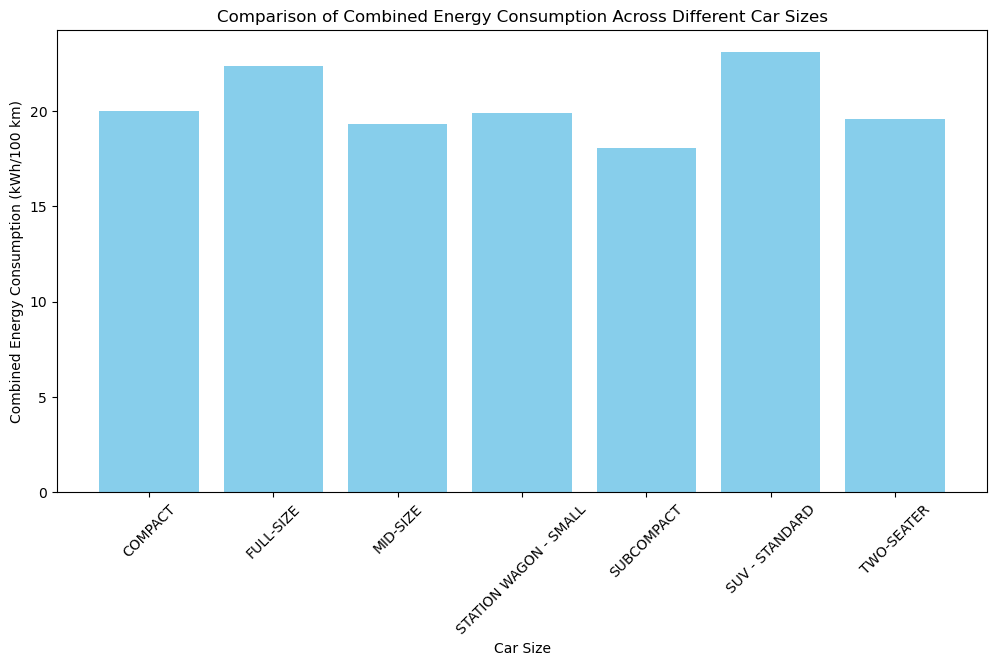

In [12]:
print(energy_consumption_by_size.head())

# Visualization
print(energy_consumption_by_size)

# Visualization
plt.figure(figsize=(12, 6))
plt.bar(energy_consumption_by_size['Size'], energy_consumption_by_size['COMB (kWh/100 km)'], color='skyblue')
plt.xlabel('Car Size')
plt.ylabel('Combined Energy Consumption (kWh/100 km)')
plt.title('Comparison of Combined Energy Consumption Across Different Car Sizes')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Group by 'YEAR' and calculate the mean of the energy consumption and emissions columns
trends_by_year = cars_df.groupby('YEAR')[['CITY (kWh/100 km)', 'HWY (kWh/100 km)', 'COMB (kWh/100 km)', '(g/km)']].mean().reset_index()


   YEAR  CITY (kWh/100 km)  HWY (kWh/100 km)  COMB (kWh/100 km)  (g/km)
0  2012          18.100000         22.200000          19.900000     0.0
1  2013          20.211111         22.277778          21.144444     0.0
2  2014          19.188889         21.777778          20.355556     0.0
3  2015          19.392857         21.385714          20.292857     0.0
4  2016          19.947368         21.384211          20.594737     0.0


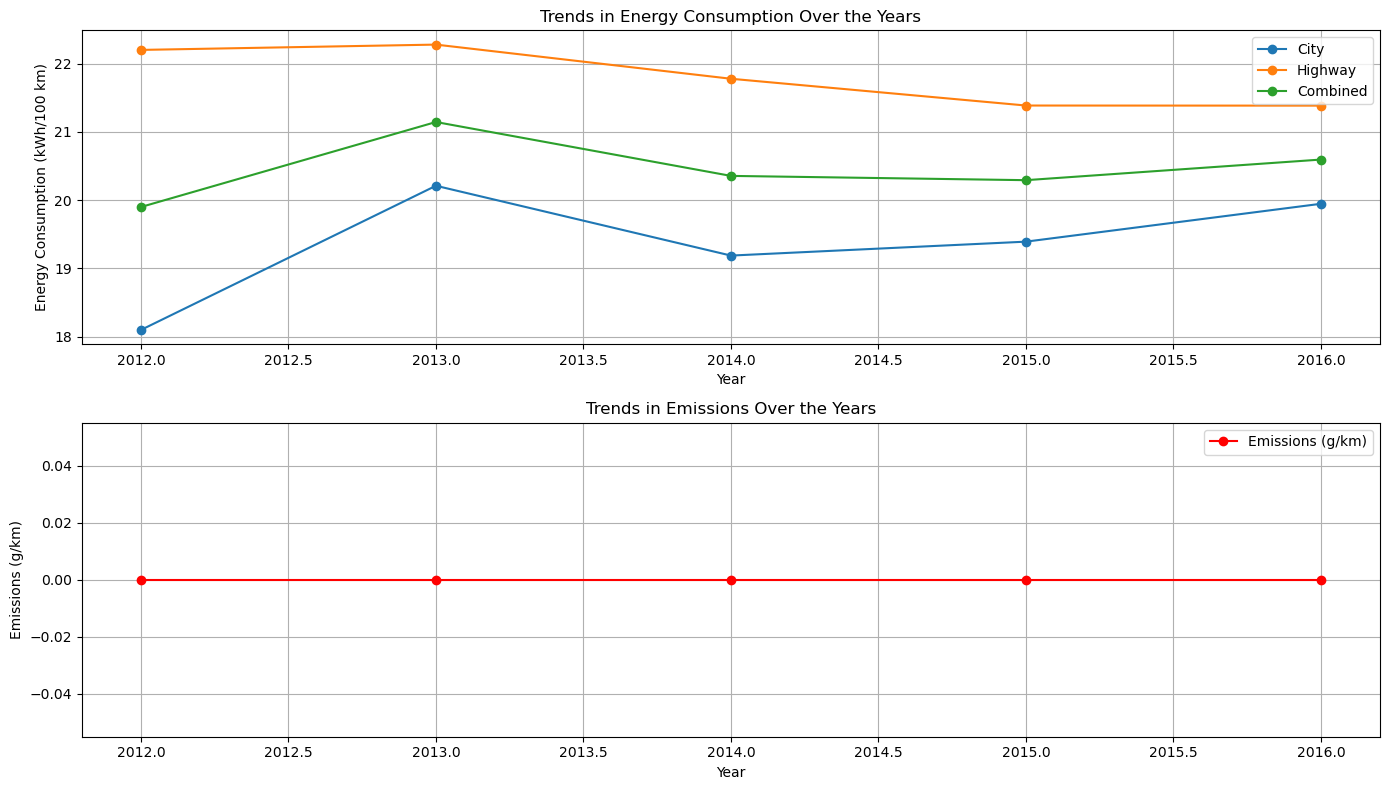

In [14]:
# Display the results
print(trends_by_year)

# Visualization
plt.figure(figsize=(14, 8))

# Plotting trends for energy consumption
plt.subplot(2, 1, 1)
plt.plot(trends_by_year['YEAR'], trends_by_year['CITY (kWh/100 km)'], label='City', marker='o')
plt.plot(trends_by_year['YEAR'], trends_by_year['HWY (kWh/100 km)'], label='Highway', marker='o')
plt.plot(trends_by_year['YEAR'], trends_by_year['COMB (kWh/100 km)'], label='Combined', marker='o')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (kWh/100 km)')
plt.title('Trends in Energy Consumption Over the Years')
plt.legend()
plt.grid(True)

# Plotting trends for emissions
plt.subplot(2, 1, 2)
plt.plot(trends_by_year['YEAR'], trends_by_year['(g/km)'], label='Emissions (g/km)', color='red', marker='o')
plt.xlabel('Year')
plt.ylabel('Emissions (g/km)')
plt.title('Trends in Emissions Over the Years')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Efficiency Analysis

In [15]:
# Calculate a combined efficiency metric (lower is better)
cars_df['Efficiency'] = cars_df['COMB (kWh/100 km)'] + cars_df['(g/km)']

# Sort by combined energy consumption and emissions (Efficiency)
most_efficient_cars = cars_df.sort_values(by=['Efficiency']).head(10)
least_efficient_cars = cars_df.sort_values(by=['Efficiency'], ascending=False).head(10)

# Display the most and least efficient cars
print("Most Efficient Cars:")
print(most_efficient_cars[['Make', 'Model', 'YEAR', 'COMB (kWh/100 km)', '(g/km)', 'Efficiency']])

print("\nLeast Efficient Cars:")
print(least_efficient_cars[['Make', 'Model', 'YEAR', 'COMB (kWh/100 km)', '(g/km)', 'Efficiency']])

Most Efficient Cars:
          Make                  Model  YEAR  COMB (kWh/100 km)  (g/km)  \
34         BMW                     i3  2016               16.8       0   
20         BMW                     i3  2015               16.8       0   
35   CHEVROLET               SPARK EV  2016               17.8       0   
21   CHEVROLET               SPARK EV  2015               17.8       0   
11   CHEVROLET               SPARK EV  2014               17.8       0   
39      NISSAN  LEAF (24 kWh battery)  2016               18.4       0   
25      NISSAN                   LEAF  2015               18.4       0   
14      NISSAN                   LEAF  2014               18.4       0   
40      NISSAN  LEAF (30 kWh battery)  2016               18.6       0   
3   MITSUBISHI                 i-MiEV  2013               18.7       0   

    Efficiency  
34        16.8  
20        16.8  
35        17.8  
21        17.8  
11        17.8  
39        18.4  
25        18.4  
14        18.4  
40        1

Correlation Matrix:
                        (kW)  CITY (kWh/100 km)  HWY (kWh/100 km)  \
(kW)               1.000000           0.827555          0.046083   
CITY (kWh/100 km)  0.827555           1.000000          0.442151   
HWY (kWh/100 km)   0.046083           0.442151          1.000000   
COMB (kWh/100 km)  0.706847           0.965258          0.657155   
(km)               0.894615           0.906960          0.166217   

                   COMB (kWh/100 km)      (km)  
(kW)                        0.706847  0.894615  
CITY (kWh/100 km)           0.965258  0.906960  
HWY (kWh/100 km)            0.657155  0.166217  
COMB (kWh/100 km)           1.000000  0.807819  
(km)                        0.807819  1.000000  


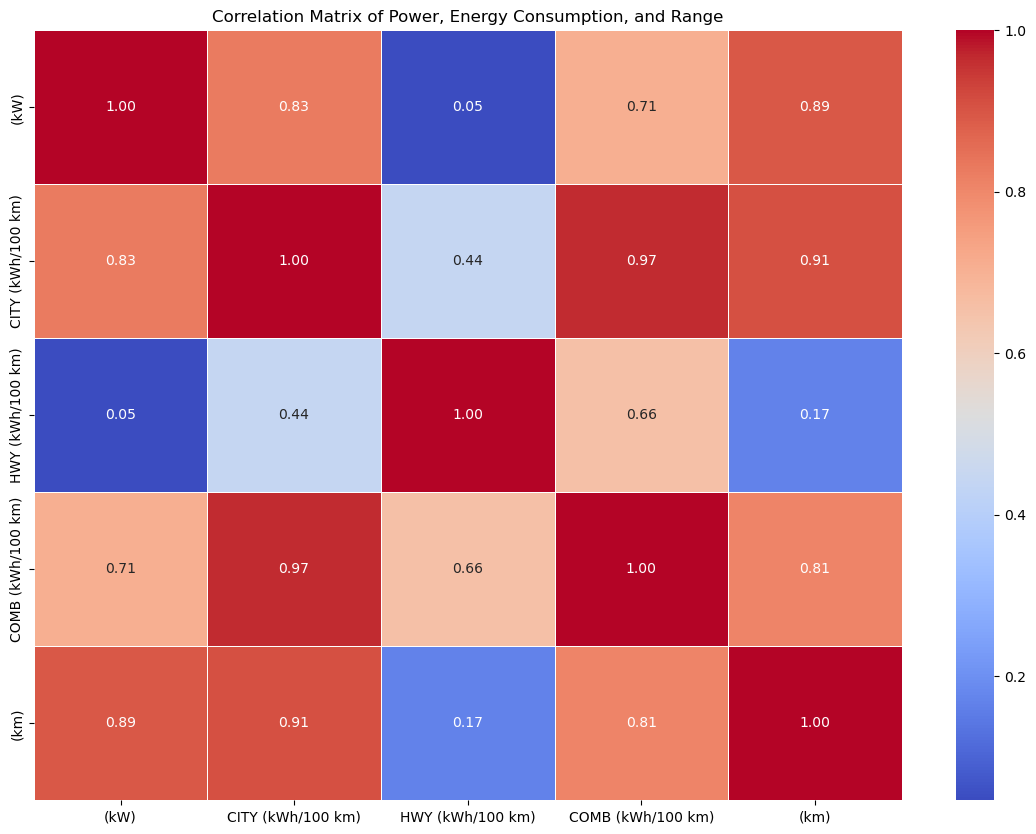

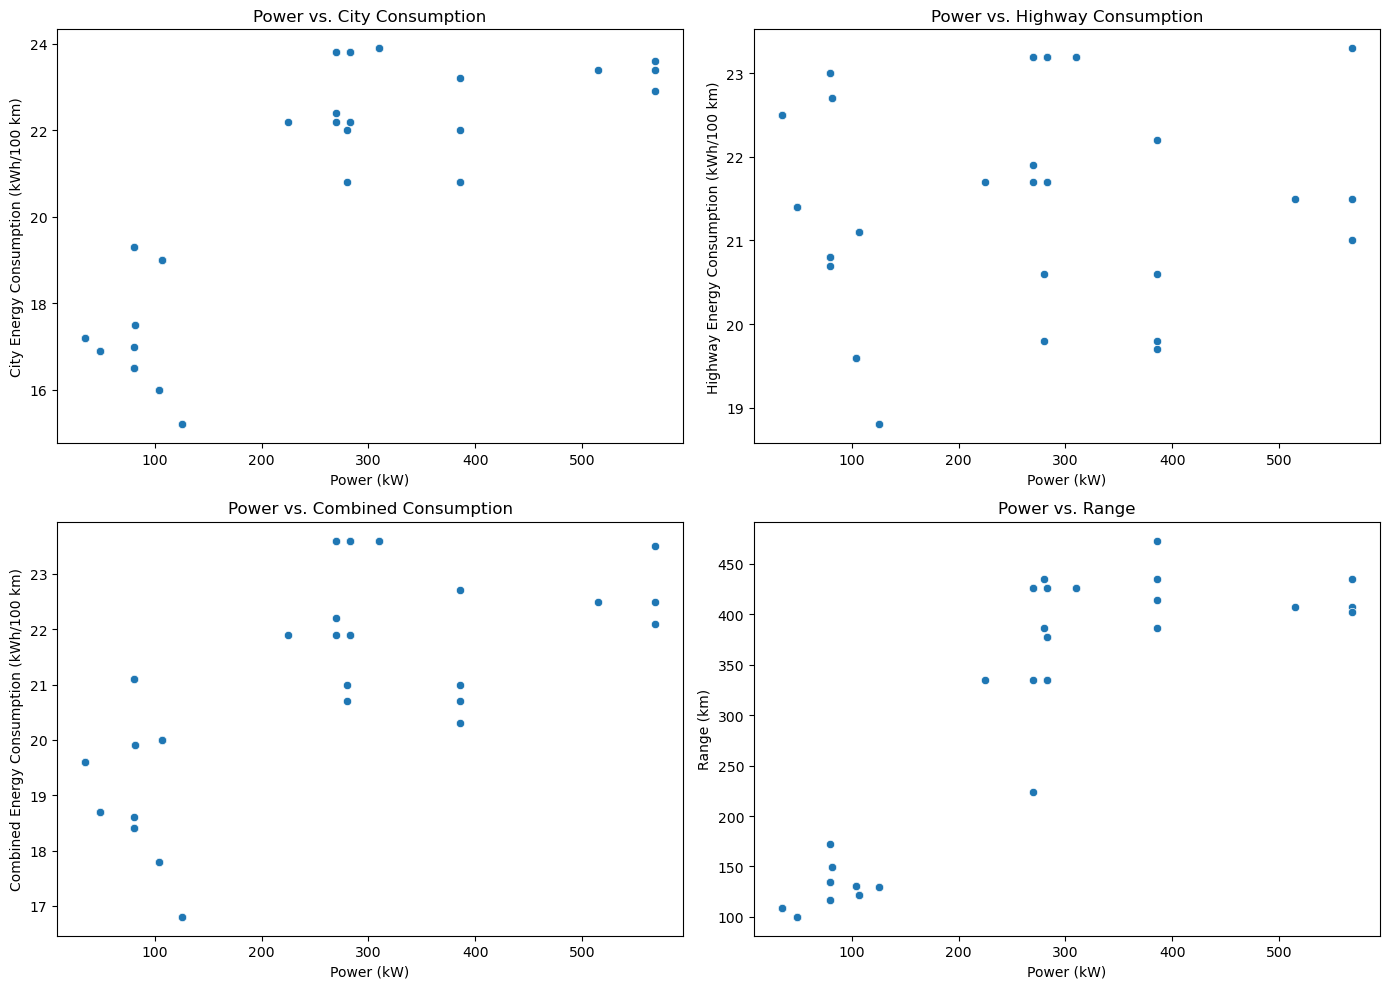

In [16]:

# Convert relevant columns to numeric (if not already)
cars_df['(kW)'] = pd.to_numeric(cars_df['(kW)'], errors='coerce')
cars_df['CITY (kWh/100 km)'] = pd.to_numeric(cars_df['CITY (kWh/100 km)'], errors='coerce')
cars_df['HWY (kWh/100 km)'] = pd.to_numeric(cars_df['HWY (kWh/100 km)'], errors='coerce')
cars_df['COMB (kWh/100 km)'] = pd.to_numeric(cars_df['COMB (kWh/100 km)'], errors='coerce')
cars_df['(km)'] = pd.to_numeric(cars_df['(km)'], errors='coerce')

# Calculate correlations
correlation_matrix = cars_df[['(kW)', 'CITY (kWh/100 km)', 'HWY (kWh/100 km)', 'COMB (kWh/100 km)', '(km)']].corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualization
plt.figure(figsize=(14, 10))

# Heatmap of correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Power, Energy Consumption, and Range')
plt.show()

# Scatter plots for visual inspection
plt.figure(figsize=(14, 10))

# Scatter plot for Power vs. City Consumption
plt.subplot(2, 2, 1)
sns.scatterplot(x='(kW)', y='CITY (kWh/100 km)', data=cars_df)
plt.xlabel('Power (kW)')
plt.ylabel('City Energy Consumption (kWh/100 km)')
plt.title('Power vs. City Consumption')

# Scatter plot for Power vs. Highway Consumption
plt.subplot(2, 2, 2)
sns.scatterplot(x='(kW)', y='HWY (kWh/100 km)', data=cars_df)
plt.xlabel('Power (kW)')
plt.ylabel('Highway Energy Consumption (kWh/100 km)')
plt.title('Power vs. Highway Consumption')

# Scatter plot for Power vs. Combined Consumption
plt.subplot(2, 2, 3)
sns.scatterplot(x='(kW)', y='COMB (kWh/100 km)', data=cars_df)
plt.xlabel('Power (kW)')
plt.ylabel('Combined Energy Consumption (kWh/100 km)')
plt.title('Power vs. Combined Consumption')

# Scatter plot for Power vs. Range
plt.subplot(2, 2, 4)
sns.scatterplot(x='(kW)', y='(km)', data=cars_df)
plt.xlabel('Power (kW)')
plt.ylabel('Range (km)')
plt.title('Power vs. Range')

plt.tight_layout()
plt.show()

## Time Series Analysis

In [ ]:
# Convert relevant columns to numeric
cars_df['CITY (kWh/100 km)'] = pd.to_numeric(cars_df['CITY (kWh/100 km)'], errors='coerce')
cars_df['HWY (kWh/100 km)'] = pd.to_numeric(cars_df['HWY (kWh/100 km)'], errors='coerce')
cars_df['COMB (kWh/100 km)'] = pd.to_numeric(cars_df['COMB (kWh/100 km)'], errors='coerce')
cars_df['(g/km)'] = pd.to_numeric(cars_df['(g/km)'], errors='coerce')
cars_df['YEAR'] = pd.to_numeric(cars_df['YEAR'], errors='coerce')

# Group by year and calculate the mean of the energy consumption and emissions columns
trends_by_year = cars_df.groupby('YEAR')[['CITY (kWh/100 km)', 'HWY (kWh/100 km)', 'COMB (kWh/100 km)', '(g/km)']].mean().reset_index()

# Display the trends by year
print(trends_by_year)

# Visualization
plt.figure(figsize=(14, 8))

# Plotting trends for energy consumption
plt.subplot(2, 1, 1)
plt.plot(trends_by_year['YEAR'], trends_by_year['CITY (kWh/100 km)'], label='City', marker='o')
plt.plot(trends_by_year['YEAR'], trends_by_year['HWY (kWh/100 km)'], label='Highway', marker='o')
plt.plot(trends_by_year['YEAR'], trends_by_year['COMB (kWh/100 km)'], label='Combined', marker='o')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (kWh/100 km)')
plt.title('Trends in Energy Consumption Over the Years')
plt.legend()
plt.grid(True)

# Plotting trends for emissions
plt.subplot(2, 1, 2)
plt.plot(trends_by_year['YEAR'], trends_by_year['(g/km)'], label='Emissions (g/km)', color='red', marker='o')
plt.xlabel('Year')
plt.ylabel('Emissions (g/km)')
plt.title('Trends in Emissions Over the Years')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Forecasting

In [ ]:
# Convert relevant columns to numeric
import statsmodels.api as smapi
cars_df['CITY (kWh/100 km)'] = pd.to_numeric(cars_df['CITY (kWh/100 km)'], errors='coerce')
cars_df['HWY (kWh/100 km)'] = pd.to_numeric(cars_df['HWY (kWh/100 km)'], errors='coerce')
cars_df['COMB (kWh/100 km)'] = pd.to_numeric(cars_df['COMB (kWh/100 km)'], errors='coerce')
cars_df['(g/km)'] = pd.to_numeric(cars_df['(g/km)'], errors='coerce')
cars_df['YEAR'] = pd.to_numeric(cars_df['YEAR'], errors='coerce')

# Set 'YEAR' as the index
cars_df.set_index('YEAR', inplace=True)

# Select the column to forecast
data_to_forecast = cars_df['COMB (kWh/100 km)']

# Plot the historical data
plt.figure(figsize=(14, 6))
plt.plot(data_to_forecast, label='Historical Data')
plt.xlabel('Year')
plt.ylabel('Combined Energy Consumption (kWh/100 km)')
plt.title('Historical Data of Combined Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

# Split data into training and testing set
train_data = data_to_forecast[:int(len(data_to_forecast) * 0.8)]
test_data = data_to_forecast[int(len(data_to_forecast) * 0.8):]

# Fit ARIMA model
model = smapi.tsa.arima.ARIMA(train_data, order=(1, 1, 2))  # Order can be tuned
model_fit = model.fit()

# Forecasting
forecast_steps = 10  # Number of future steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)[0]

# Create a DataFrame for the forecast
forecast_index = pd.date_range(start=train_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='Y')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(data_to_forecast, label='Historical Data')
plt.plot(forecast_df, label='Forecast', color='red')
plt.xlabel('Year')
plt.ylabel('Combined Energy Consumption (kWh/100 km)')
plt.title('Forecast of Combined Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

print(forecast_df)

## Categorical Analysis

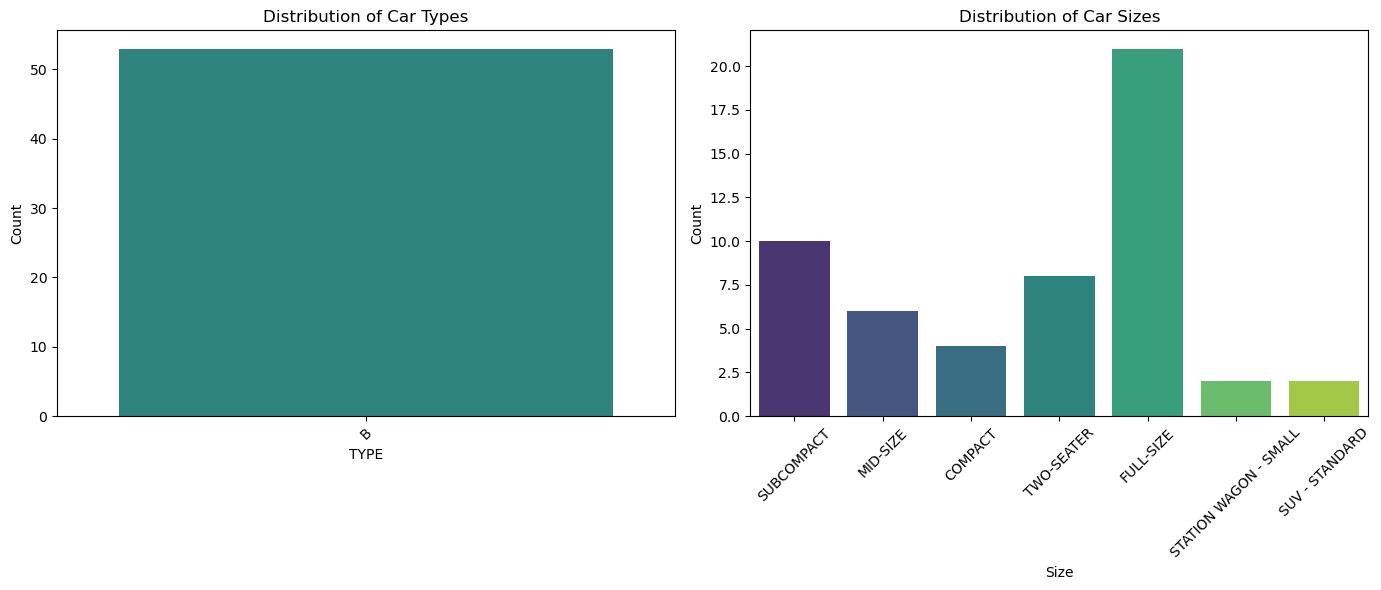

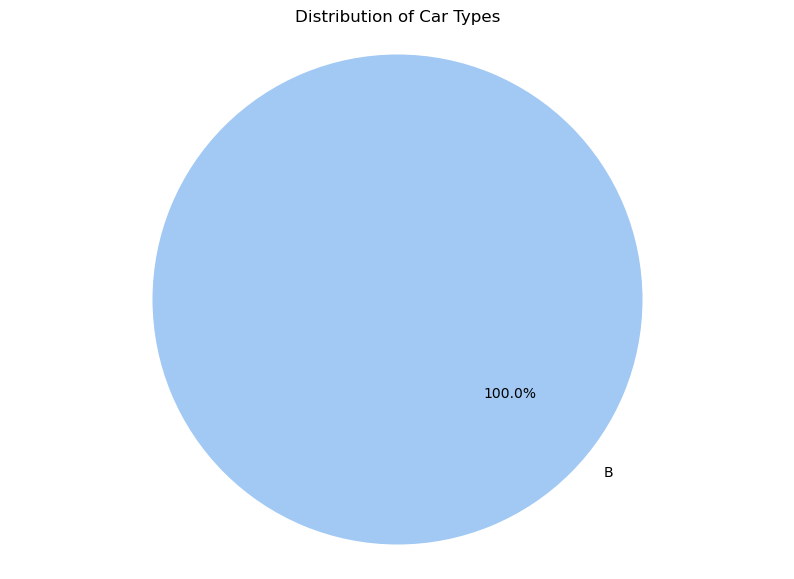

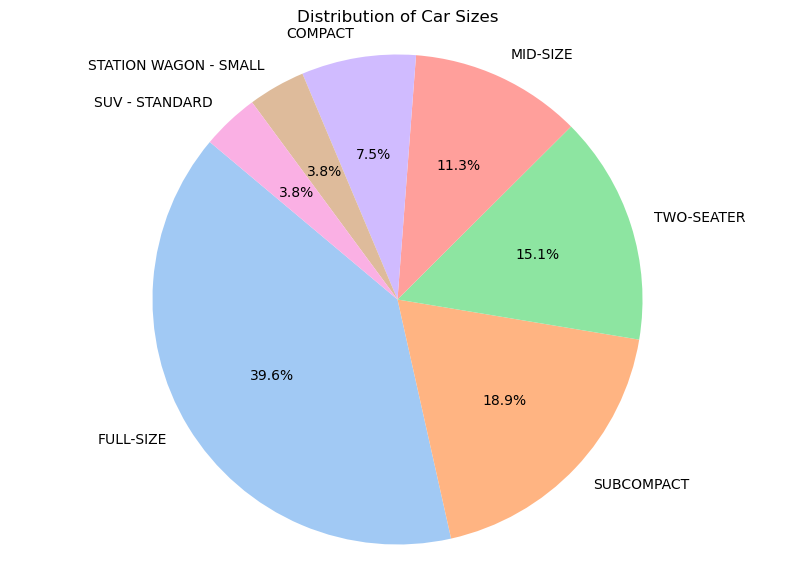

In [28]:
cars_df['TYPE'] = cars_df['TYPE'].astype(str)
cars_df['Size'] = cars_df['Size'].astype(str)

# Plotting the distribution of car types
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=cars_df, x='TYPE', hue = 'TYPE', palette='viridis', legend= False)
plt.title('Distribution of Car Types')
plt.xticks(rotation=45)
plt.ylabel('Count')

# Plotting the distribution of car sizes
plt.subplot(1, 2, 2)
sns.countplot(data=cars_df, x='Size', hue='Size', palette='viridis', legend=False)
plt.title('Distribution of Car Sizes')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Pie chart for car types distribution
plt.figure(figsize=(10, 7))
car_type_counts = cars_df['TYPE'].value_counts()
plt.pie(car_type_counts, labels=car_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Car Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Pie chart for car sizes distribution
plt.figure(figsize=(10, 7))
car_size_counts = cars_df['Size'].value_counts()
plt.pie(car_size_counts, labels=car_size_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Car Sizes')
plt.axis('equal')
plt.show()

   YEAR        Make           Model        Size  (kW) Unnamed: 5 TYPE  \
0  2012  MITSUBISHI          i-MiEV  SUBCOMPACT    49         A1    B   
1  2012      NISSAN            LEAF    MID-SIZE    80         A1    B   
2  2013        FORD  FOCUS ELECTRIC     COMPACT   107         A1    B   
3  2013  MITSUBISHI          i-MiEV  SUBCOMPACT    49         A1    B   
4  2013      NISSAN            LEAF    MID-SIZE    80         A1    B   

   CITY (kWh/100 km)  HWY (kWh/100 km)  COMB (kWh/100 km)  CITY (Le/100 km)  \
0               16.9              21.4               18.7               1.9   
1               19.3              23.0               21.1               2.2   
2               19.0              21.1               20.0               2.1   
3               16.9              21.4               18.7               1.9   
4               19.3              23.0               21.1               2.2   

   HWY (Le/100 km)  COMB (Le/100 km)  (g/km)  RATING  (km)  TIME (h)  \
0             

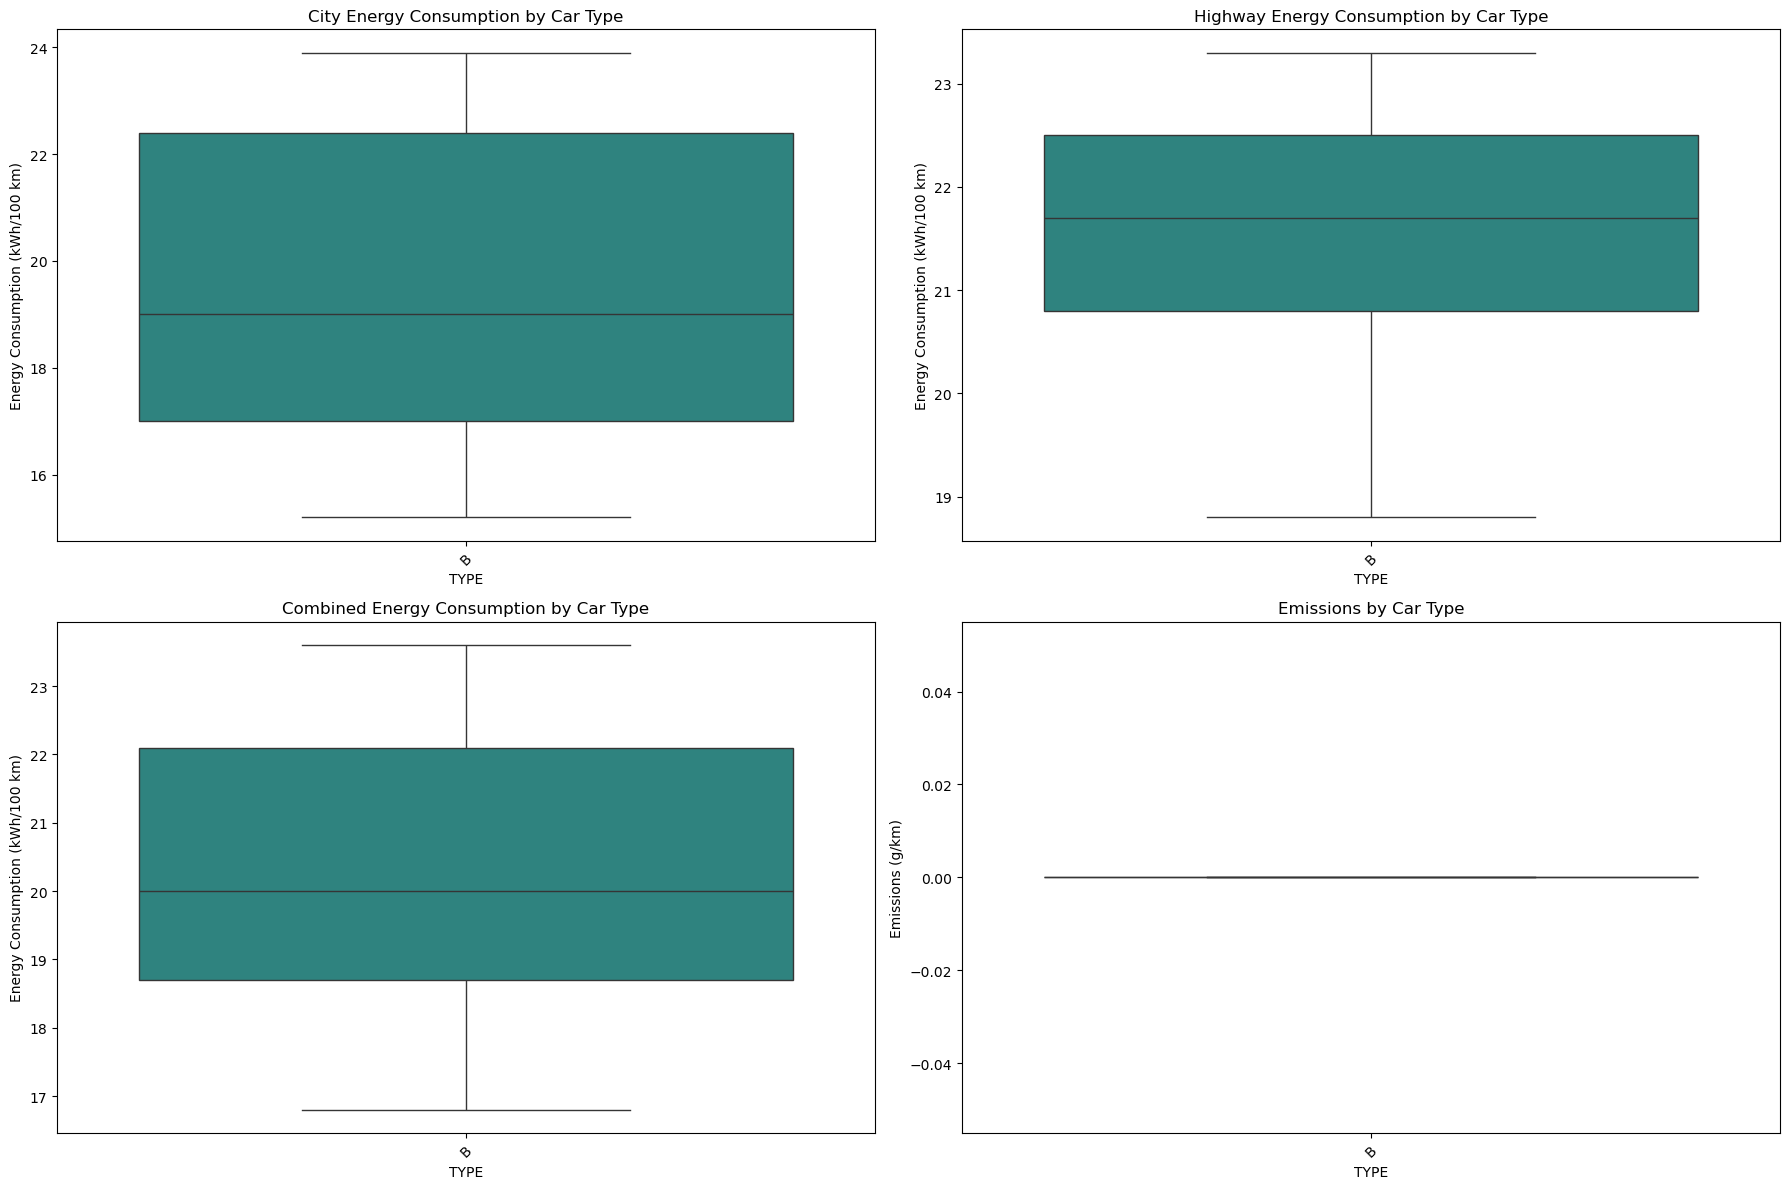

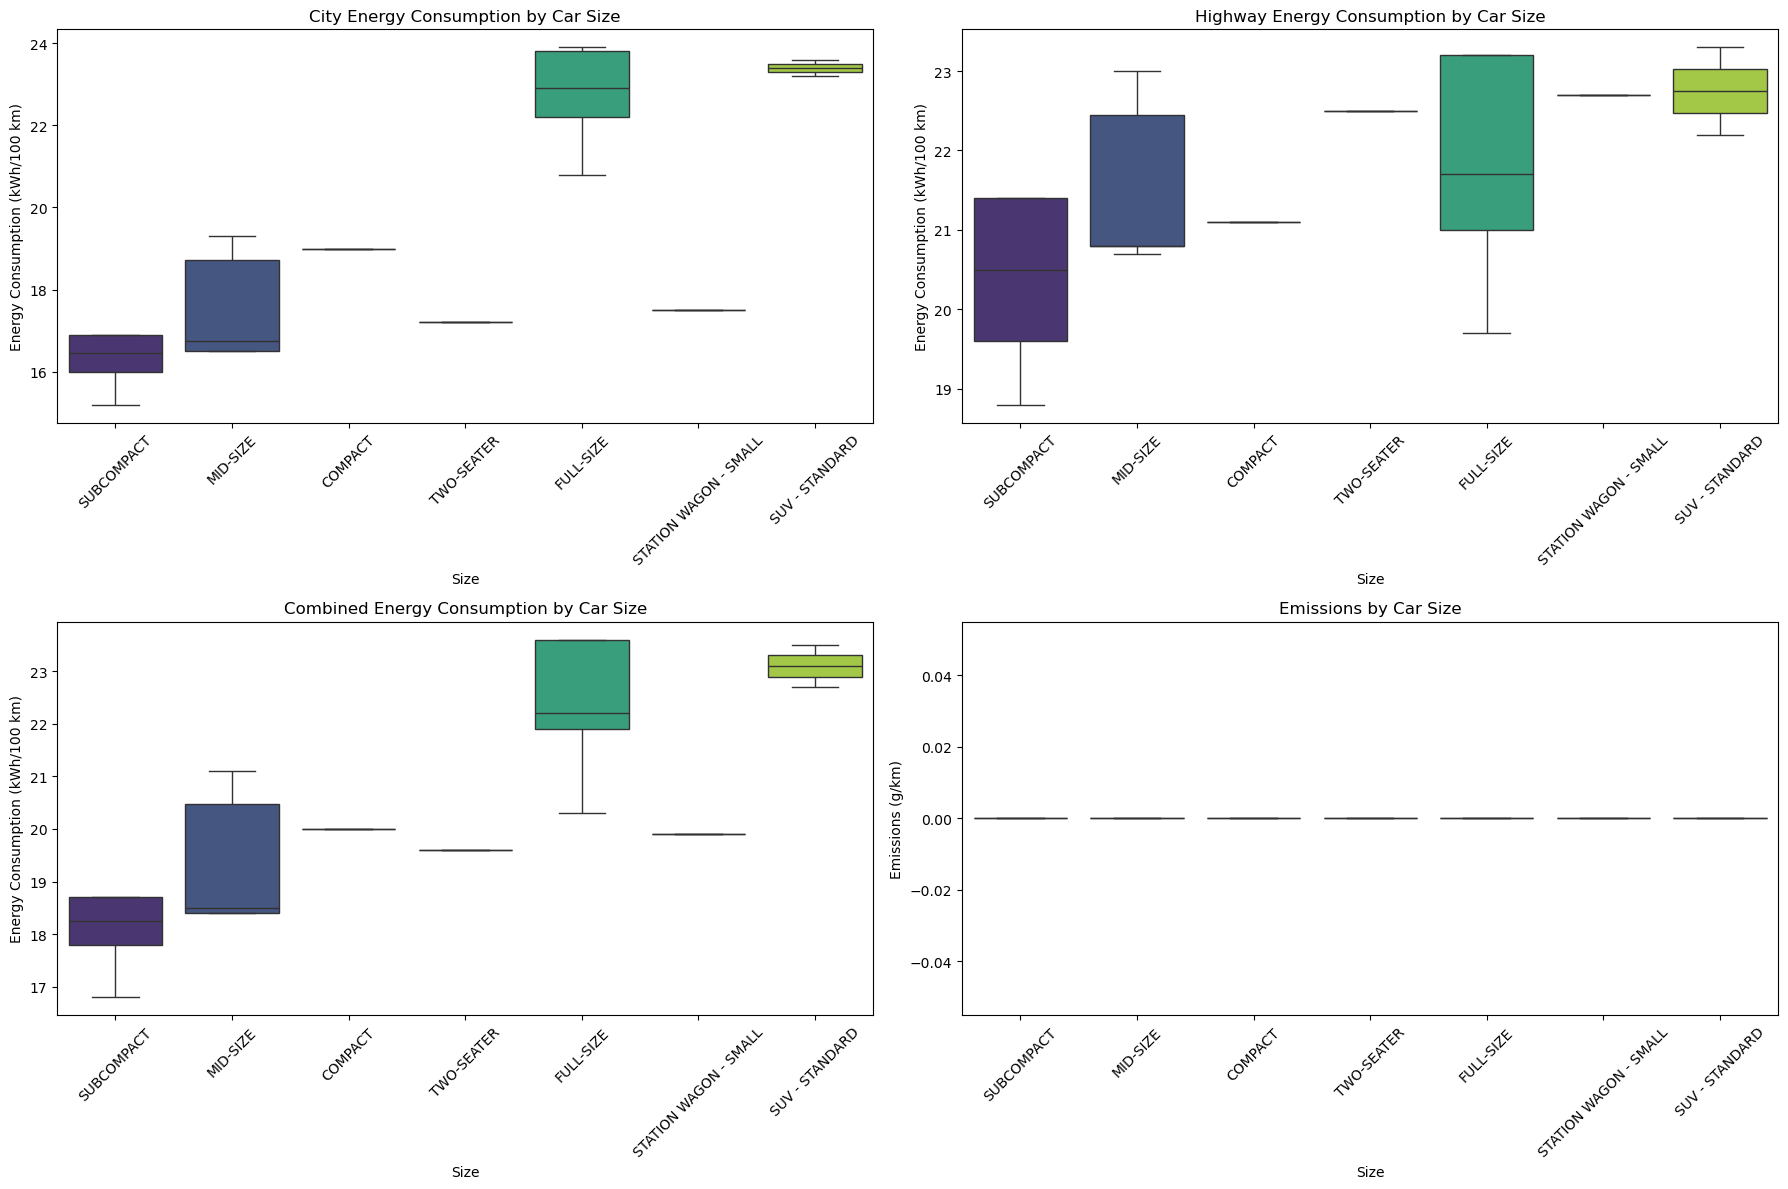

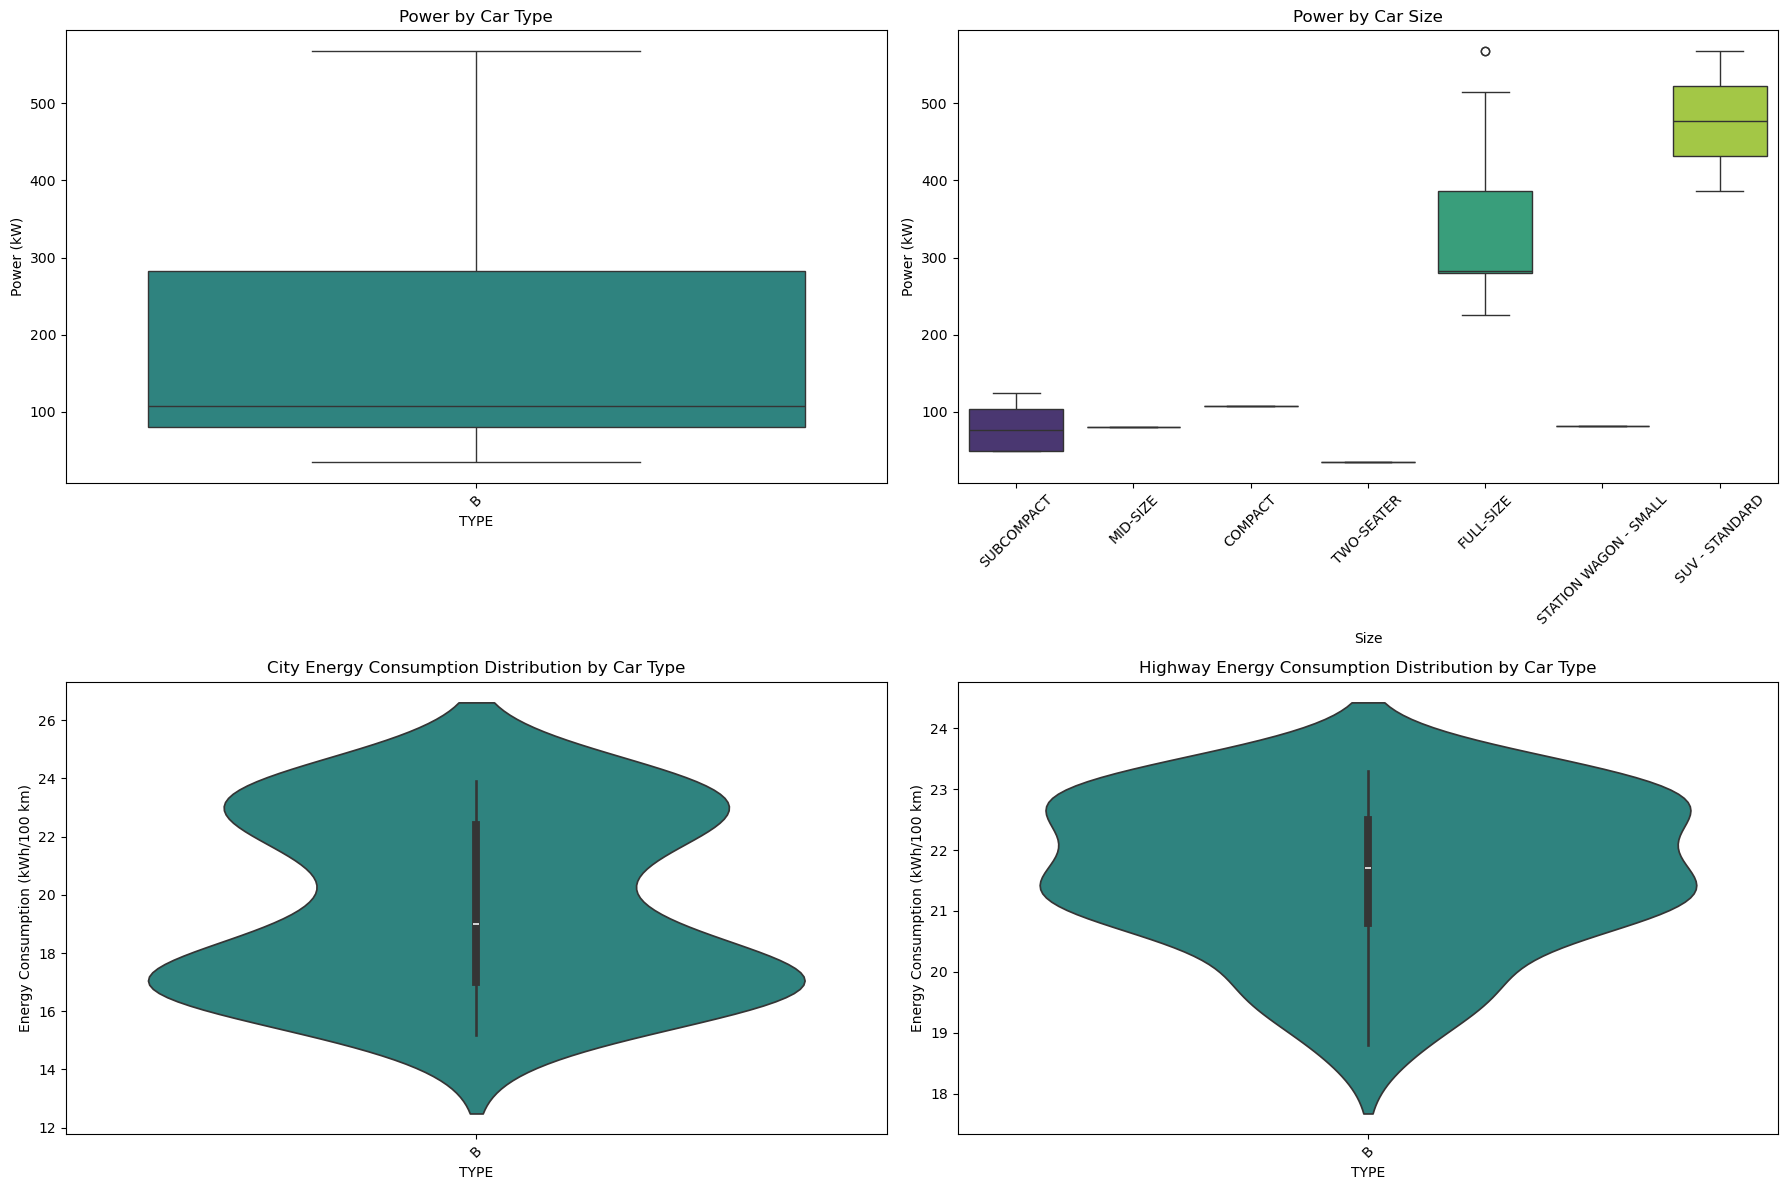

In [34]:
cars_df['CITY (kWh/100 km)'] = pd.to_numeric(cars_df['CITY (kWh/100 km)'], errors='coerce')
cars_df['HWY (kWh/100 km)'] = pd.to_numeric(cars_df['HWY (kWh/100 km)'], errors='coerce')
cars_df['COMB (kWh/100 km)'] = pd.to_numeric(cars_df['COMB (kWh/100 km)'], errors='coerce')
cars_df['(g/km)'] = pd.to_numeric(cars_df['(g/km)'], errors='coerce')
cars_df['(kW)'] = pd.to_numeric(cars_df['(kW)'], errors='coerce')
cars_df['YEAR'] = pd.to_numeric(cars_df['YEAR'], errors='coerce')

# Convert categorical columns to string type for consistent plotting
cars_df['TYPE'] = cars_df['TYPE'].astype(str)
cars_df['Size'] = cars_df['Size'].astype(str)

# Display the first few rows of the dataset
print(cars_df.head())

# Check for missing values
print(cars_df.isnull().sum())

# Set the figure size for the plots
plt.figure(figsize=(18, 12))

# Box plot for CITY energy consumption across different car types
plt.subplot(2, 2, 1)
sns.boxplot(data=cars_df, x='TYPE', hue='TYPE',y='CITY (kWh/100 km)', palette='viridis',legend=False)
plt.title('City Energy Consumption by Car Type')
plt.xticks(rotation=45)
plt.ylabel('Energy Consumption (kWh/100 km)')

# Box plot for HWY energy consumption across different car types
plt.subplot(2, 2, 2)
sns.boxplot(data=cars_df, x='TYPE', hue='TYPE', y='HWY (kWh/100 km)', palette='viridis',legend=False)
plt.title('Highway Energy Consumption by Car Type')
plt.xticks(rotation=45)
plt.ylabel('Energy Consumption (kWh/100 km)')

# Box plot for COMB energy consumption across different car types
plt.subplot(2, 2, 3)
sns.boxplot(data=cars_df, x='TYPE', hue='TYPE',y='COMB (kWh/100 km)', palette='viridis', legend=False)
plt.title('Combined Energy Consumption by Car Type')
plt.xticks(rotation=45)
plt.ylabel('Energy Consumption (kWh/100 km)')

# Box plot for Emissions across different car types
plt.subplot(2, 2, 4)
sns.boxplot(data=cars_df, x='TYPE', hue='TYPE',y='(g/km)', palette='viridis', legend=False)
plt.title('Emissions by Car Type')
plt.xticks(rotation=45)
plt.ylabel('Emissions (g/km)')

plt.tight_layout()
plt.show()

# Set the figure size for the plots
plt.figure(figsize=(18, 12))

# Box plot for CITY energy consumption across different car sizes
plt.subplot(2, 2, 1)
sns.boxplot(data=cars_df, x='Size', hue='Size',y='CITY (kWh/100 km)', palette='viridis', legend=False)
plt.title('City Energy Consumption by Car Size')
plt.xticks(rotation=45)
plt.ylabel('Energy Consumption (kWh/100 km)')

# Box plot for HWY energy consumption across different car sizes
plt.subplot(2, 2, 2)
sns.boxplot(data=cars_df, x='Size', hue='Size',y='HWY (kWh/100 km)', palette='viridis', legend=False)
plt.title('Highway Energy Consumption by Car Size')
plt.xticks(rotation=45)
plt.ylabel('Energy Consumption (kWh/100 km)')

# Box plot for COMB energy consumption across different car sizes
plt.subplot(2, 2, 3)
sns.boxplot(data=cars_df, x='Size', hue='Size',y='COMB (kWh/100 km)', palette='viridis', legend=False)
plt.title('Combined Energy Consumption by Car Size')
plt.xticks(rotation=45)
plt.ylabel('Energy Consumption (kWh/100 km)')

# Box plot for Emissions across different car sizes
plt.subplot(2, 2, 4)
sns.boxplot(data=cars_df, x='Size', hue='Size', y='(g/km)', palette='viridis', legend=False)
plt.title('Emissions by Car Size')
plt.xticks(rotation=45)
plt.ylabel('Emissions (g/km)')

plt.tight_layout()
plt.show()

# Set the figure size for the plots
plt.figure(figsize=(18, 12))

# Box plot for Power across different car types
plt.subplot(2, 2, 1)
sns.boxplot(data=cars_df, x='TYPE', hue='TYPE',y='(kW)', palette='viridis', legend=False)
plt.title('Power by Car Type')
plt.xticks(rotation=45)
plt.ylabel('Power (kW)')

# Box plot for Power across different car sizes
plt.subplot(2, 2, 2)
sns.boxplot(data=cars_df, x='Size', hue='Size',y='(kW)', palette='viridis', legend=False)
plt.title('Power by Car Size')
plt.xticks(rotation=45)
plt.ylabel('Power (kW)')

# Violin plot for City energy consumption across different car types
plt.subplot(2, 2, 3)
sns.violinplot(data=cars_df, x='TYPE', hue='TYPE',y='CITY (kWh/100 km)', palette='viridis',legend=False)
plt.title('City Energy Consumption Distribution by Car Type')
plt.xticks(rotation=45)
plt.ylabel('Energy Consumption (kWh/100 km)')

# Violin plot for Highway energy consumption across different car types
plt.subplot(2, 2, 4)
sns.violinplot(data=cars_df, x='TYPE', hue='TYPE',y='HWY (kWh/100 km)', palette='viridis',legend=False)
plt.title('Highway Energy Consumption Distribution by Car Type')
plt.xticks(rotation=45)
plt.ylabel('Energy Consumption (kWh/100 km)')

plt.tight_layout()
plt.show()

## Correlation Analysis

   YEAR        Make           Model        Size  (kW) Unnamed: 5 TYPE  \
0  2012  MITSUBISHI          i-MiEV  SUBCOMPACT    49         A1    B   
1  2012      NISSAN            LEAF    MID-SIZE    80         A1    B   
2  2013        FORD  FOCUS ELECTRIC     COMPACT   107         A1    B   
3  2013  MITSUBISHI          i-MiEV  SUBCOMPACT    49         A1    B   
4  2013      NISSAN            LEAF    MID-SIZE    80         A1    B   

   CITY (kWh/100 km)  HWY (kWh/100 km)  COMB (kWh/100 km)  CITY (Le/100 km)  \
0               16.9              21.4               18.7               1.9   
1               19.3              23.0               21.1               2.2   
2               19.0              21.1               20.0               2.1   
3               16.9              21.4               18.7               1.9   
4               19.3              23.0               21.1               2.2   

   HWY (Le/100 km)  COMB (Le/100 km)  (g/km)  RATING  (km)  TIME (h)  \
0             

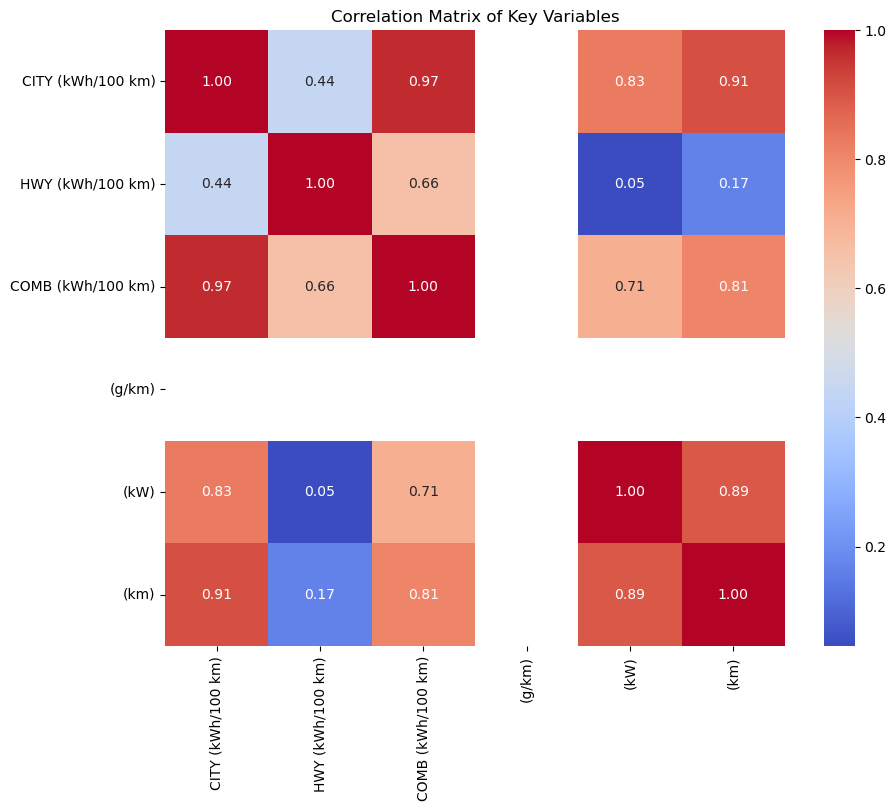

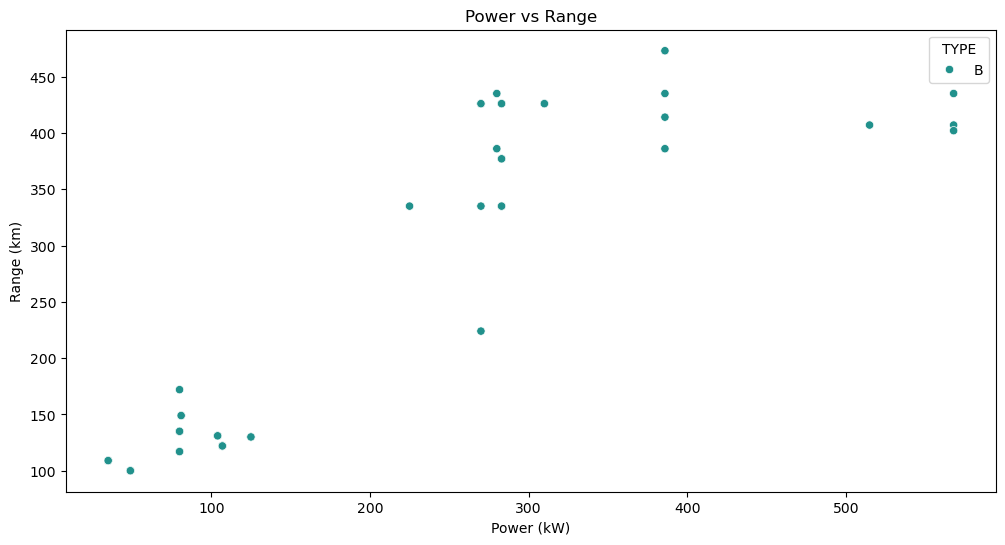

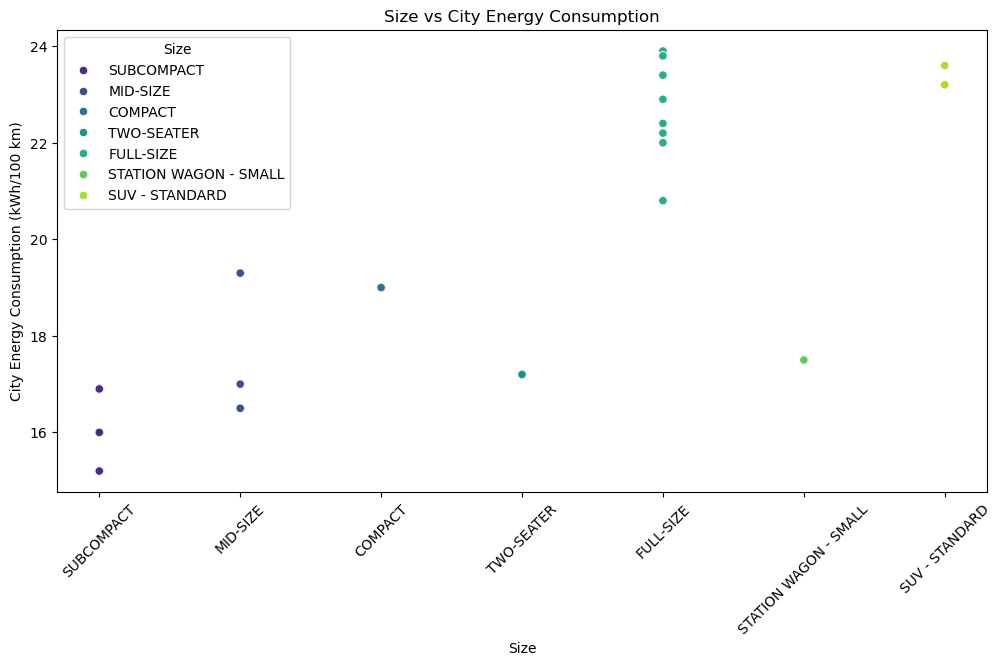

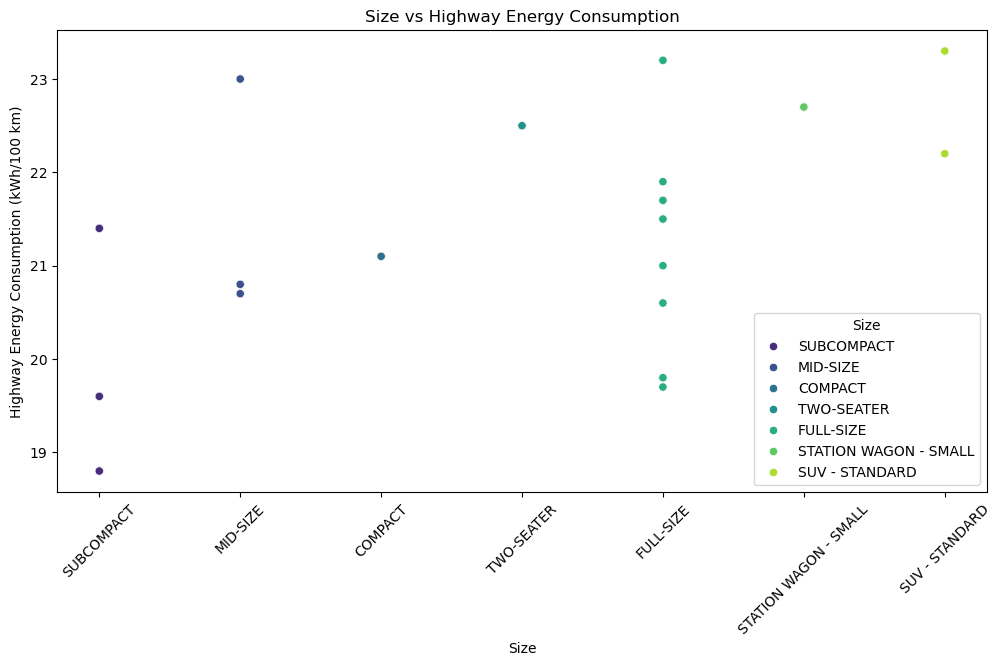

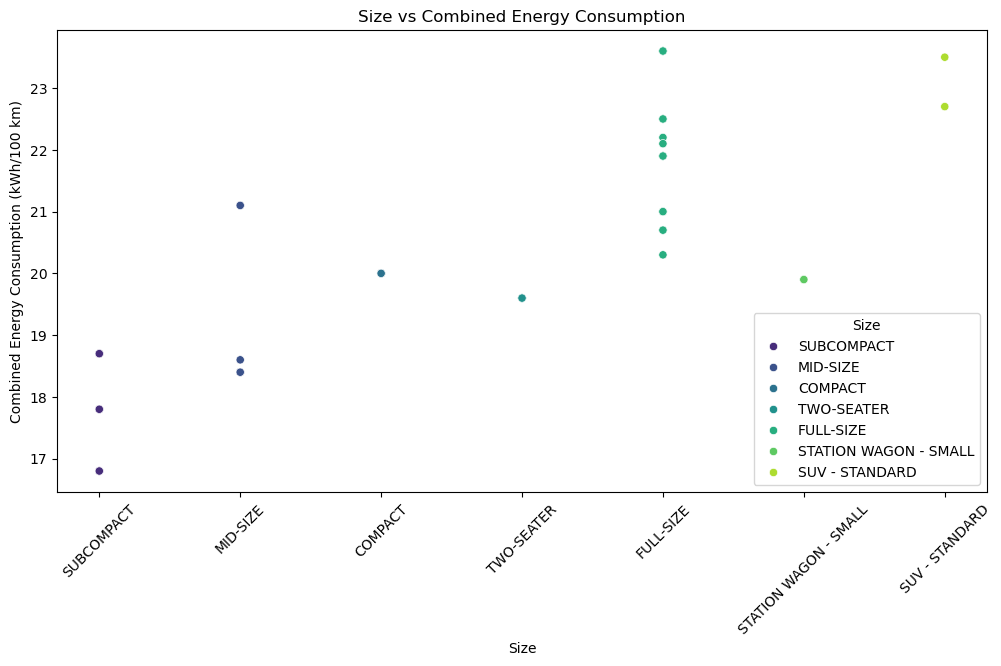

In [37]:
# Convert relevant columns to numeric
cars_df['CITY (kWh/100 km)'] = pd.to_numeric(cars_df['CITY (kWh/100 km)'], errors='coerce')
cars_df['HWY (kWh/100 km)'] = pd.to_numeric(cars_df['HWY (kWh/100 km)'], errors='coerce')
cars_df['COMB (kWh/100 km)'] = pd.to_numeric(cars_df['COMB (kWh/100 km)'], errors='coerce')
cars_df['(g/km)'] = pd.to_numeric(cars_df['(g/km)'], errors='coerce')
cars_df['(kW)'] = pd.to_numeric(cars_df['(kW)'], errors='coerce')
cars_df['(km)'] = pd.to_numeric(cars_df['(km)'], errors='coerce')

# Convert categorical columns to string type for consistent plotting
cars_df['TYPE'] = cars_df['TYPE'].astype(str)
cars_df['Size'] = cars_df['Size'].astype(str)

# Display the first few rows of the dataset
print(cars_df.head())

# Check for missing values
print(cars_df.isnull().sum())

# Calculate correlation matrix
correlation_matrix = cars_df[['CITY (kWh/100 km)', 'HWY (kWh/100 km)', 'COMB (kWh/100 km)', '(g/km)', '(kW)', '(km)']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Variables')
plt.show()

# Scatter plot for Power vs Range
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cars_df, x='(kW)', y='(km)', hue='TYPE', palette='viridis', legend='full')
plt.title('Power vs Range')
plt.xlabel('Power (kW)')
plt.ylabel('Range (km)')
plt.show()

# Scatter plot for Size vs City Energy Consumption
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cars_df, x='Size', y='CITY (kWh/100 km)', hue='Size', palette='viridis', legend='full')
plt.title('Size vs City Energy Consumption')
plt.xlabel('Size')
plt.ylabel('City Energy Consumption (kWh/100 km)')
plt.xticks(rotation=45)
plt.show()

# Scatter plot for Size vs Highway Energy Consumption
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cars_df, x='Size', y='HWY (kWh/100 km)', hue='Size', palette='viridis', legend='full')
plt.title('Size vs Highway Energy Consumption')
plt.xlabel('Size')
plt.ylabel('Highway Energy Consumption (kWh/100 km)')
plt.xticks(rotation=45)
plt.show()

# Scatter plot for Size vs Combined Energy Consumption
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cars_df, x='Size', y='COMB (kWh/100 km)', hue='Size', palette='viridis', legend='full')
plt.title('Size vs Combined Energy Consumption')
plt.xlabel('Size')
plt.ylabel('Combined Energy Consumption (kWh/100 km)')
plt.xticks(rotation=45)
plt.show()